In [10]:
from learning.clustering.mst import MinimumSpanningTrees, Graph, Cluster, PriorityQueue
import matplotlib.pyplot as plt
%matplotlib inline

# A review of 2 decades of correlation,  hierarchies, netowrks and clustering

### Aim
The aim of this project is to review state of the art clustering algorithms for financial time series and to study their correlation in complicated networks.  This will form the basis of an 
open toolbox to study correlations, hierarchies, networks and clustering in financial markets

### Methodology adopted in Financial markets:

- we compute log returns using the formula: $r_t = log(1 + R_t)$

where $1 + R_t = \frac{P_i(t)}{P_i(t-1)}$

- The sample correlation matrix is given by: $\Omega = \frac{1}{n} R^T R $
  
  where $R$ is given by returns matrix minus sample mean return for that stock

- Once we get the correlation matrix, we convert it to distances given by the formula: 
 
  $d = \sqrt{2 (1 - \Omega)}$

  where d is a nxn distance matrix which is symmetric and since $\Omega$ is symmetric positive definite, $d$ is symmetric positive definite as well.  

### Methodology described in Paper:

- Once we compute the distance matrix, we compute the minimum spanning tree using Kruskal's algorithm

### Implementation

- Python 3.6 is used as the primary language 
- libraries used: numpy, yfinance to download prices, heapq, itertools & networkx library for plotting
- DataStructures and Classes used: 
    - A graph class is implemented using adjacency map. 
    - A priority queue class is implemented using  heapq module to keep track of minimum weight in Kruska's algorithm.  This ensures finding the minimum is done in O(1) operation.  Addition and removal are worse case O(floor(mlogn)) where m is the number of edges and n is the number of nodes
    - A cluster class is implemented using union find algorithm to merge clusters in same group
    - A MinimumSpanningTree class is implemented with a nested Price class that downloads prices and computes the distances.  Calling this library automatically downloads prices from yahoo and computes their distances.  A start and end parameter is all is needed to get historical prices of 50 shares
    - Share names were obtained from sp500 index as of Tuesday July 16. 

- Redundancy
    - Networkx library was used to create another graph inside mst.draw_graph() function.  This is mainly used for plotting and visualization of the network structure of the correlation matrix.  

- Analysis
    - When distance is 0, correlation is 1 or -1 i.e perfectly correlation.  Higher the distance, less correlation between the share prices 

 


In [10]:
# set parameters here
start = '2019-01-01'
end = '2019-12-31'
mst = MinimumSpanningTrees(start=start, end=end)
# create a graph from distance computed from mst
# share prices are the vertices and edges are the distance from two share prices
g = mst.create_graph()
# get the minimum spanning tree from the graph
mst_tree = mst.mst_kruskal(g)

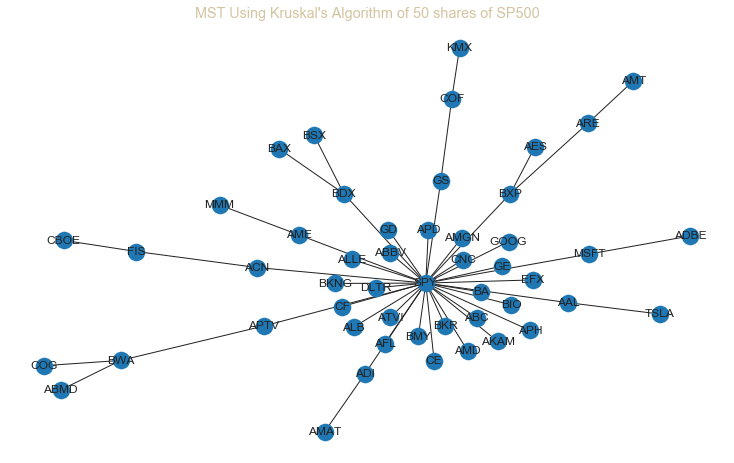

In [11]:
# plot the minimum spanning tree
plt.figure(figsize=(10,6))
mst.draw_graph(mst_tree)
plt.title("MST Using Kruskal's Algorithm of 50 shares of SP500");

# Observation
- All the shares are strongly correlated with SPY which makes sense since SPY is an index that contains all the other shares

### Note: 
- Following is the edge weights associated with the spanning tree

In [14]:
mst_tree

[Edge((Vertex('MSFT'), Vertex('SPY')): 0.61,
 Edge((Vertex('AME'), Vertex('SPY')): 0.70,
 Edge((Vertex('APH'), Vertex('SPY')): 0.73,
 Edge((Vertex('ADBE'), Vertex('MSFT')): 0.73,
 Edge((Vertex('ACN'), Vertex('SPY')): 0.73,
 Edge((Vertex('ARE'), Vertex('BXP')): 0.74,
 Edge((Vertex('APTV'), Vertex('BWA')): 0.77,
 Edge((Vertex('ADI'), Vertex('SPY')): 0.78,
 Edge((Vertex('CE'), Vertex('SPY')): 0.79,
 Edge((Vertex('EFX'), Vertex('SPY')): 0.81,
 Edge((Vertex('COF'), Vertex('GS')): 0.81,
 Edge((Vertex('GS'), Vertex('SPY')): 0.82,
 Edge((Vertex('GOOG'), Vertex('SPY')): 0.82,
 Edge((Vertex('ADI'), Vertex('AMAT')): 0.82,
 Edge((Vertex('BDX'), Vertex('BSX')): 0.82,
 Edge((Vertex('AKAM'), Vertex('SPY')): 0.85,
 Edge((Vertex('APTV'), Vertex('SPY')): 0.87,
 Edge((Vertex('AMD'), Vertex('SPY')): 0.87,
 Edge((Vertex('BDX'), Vertex('SPY')): 0.87,
 Edge((Vertex('GD'), Vertex('SPY')): 0.88,
 Edge((Vertex('ACN'), Vertex('FIS')): 0.88,
 Edge((Vertex('BAX'), Vertex('BDX')): 0.88,
 Edge((Vertex('AME'), Vertex

In [11]:
def create_graph():
    from itertools import combinations
    g = Graph()
    input_vertices = range(1, 8)
    vertices = [g.insert_vertex(v) for v in input_vertices]
    g.insert_edge(vertices[0], vertices[1], 28)
    g.insert_edge(vertices[1], vertices[2], 16)
    g.insert_edge(vertices[2], vertices[3], 12)
    g.insert_edge(vertices[3], vertices[4], 22)
    g.insert_edge(vertices[4], vertices[5], 25)
    g.insert_edge(vertices[5], vertices[0], 10)
    g.insert_edge(vertices[3], vertices[6], 18)
    g.insert_edge(vertices[4], vertices[6], 24)
    g.insert_edge(vertices[1], vertices[6], 14)
    return g 

In [12]:
g = create_graph()

In [77]:
cluster = Cluster()
pq = PriorityQueue()
position = {}
for v in g.get_vertices():
    position[v] = cluster.make_cluster(v)
for e in g.get_edges():
    pq.push(e, e.get_value())
tree = []
size = g.count_vertices()
while len(tree) != size - 1 and not pq.is_empty():
    weight, _, edge = pq.pop()
    u, v = edge.endpoint()
    a = cluster.find(position[u])
    b = cluster.find(position[v])
    if a != b: 
        tree.append(edge)
        cluster.union(a, b)

In [48]:
position[v]._container 

In [50]:
# container points to cluster object

In [54]:
position[v]._parent

In [52]:
chk = list(g.get_vertices())

In [53]:
position[chk[0]]._parent, position[chk[1]]._parent # each parent is a different position

(<learning.clustering.mst.Cluster.Position at 0x7ffea49032d0>,
 <learning.clustering.mst.Cluster.Position at 0x7ffea49035a0>)

In [55]:
position[v]

In [57]:
position[v]._parent == position[v]

True

In [59]:
w, _, edge = pq.pop()

In [61]:
u,v = edge.endpoint()

In [64]:
a = cluster.find(position[u])
b = cluster.find(position[v])

In [65]:
a

In [68]:
edge

Edge((Vertex(6), Vertex(1)): 10.00

In [70]:
a.get_value(), b.get_value()

(Vertex(6), Vertex(1))

In [71]:
a._parent

In [72]:
position[u]

In [75]:
a != b

True

In [76]:
cluster.union(a,b)

In [79]:
start = '2019-01-01'
end = '2019-12-31'
mst = MinimumSpanningTrees(start=start, end=end)

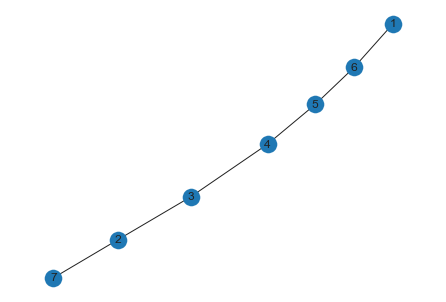

In [80]:
mst.draw_graph(tree)

In [81]:
type(cluster)

learning.clustering.mst.Cluster

In [86]:
id(v)

140731651880856

In [87]:
id(u)

140731651881192

In [88]:
id(u)

140731651881192